# aSPEM Experiment : defining a protocol




In [1]:
%run 0_parameters.ipynb


WELCOME



In [3]:
from  aSPEM import Analysis
e = Analysis() #observer=observer, mode=mode)

from aSPEM import binomial_motion

/!\ Le fichier Delete n'existe pas pour fct_velocity_2_step_False_whitening !


In [4]:
num_block = 0

color=[['k', 'k'], ['b', 'b'], ['k','none']]
alpha = [[.35, .15],[.35,.15], [0,0]]

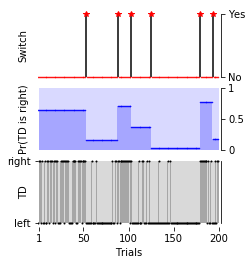

In [6]:
N_trials = 200
trials, p = binomial_motion(N_trials=N_trials, N_blocks=3, tau=40, seed=51, Jeffreys=True, N_layer=3)

    
fig, axs = plt.subplots(3, 1, figsize=(3.4, 3.4))
fig, axs = e.plot_experiment(num_block=[num_block], p=p, fig=fig, axs=axs[::-1], color=color, alpha=alpha,
                             t_label=12, titre=None, mode='planter les choux', pause=0, TD=True, ec = 0.15)



#axs[0].fill_between(range(N_trials), p[:, 0, 0], lw=.5, alpha=alpha[0][0], facecolor=color[0][0], step='pre')

mask = np.ones(N_trials)
mask[p[:, num_block, -1]==0] *= np.nan
#axs[-1].plot(np.arange(N_trials)-.5, mask-.02, '^')
#axs[-1].cla()
axs[-1].plot(np.arange(N_trials)-.5, mask, 'r*')

axs[-1].vlines(np.arange(N_trials)-.5, 0, p[:, num_block, -1] + (mask-1))


mask = np.zeros(N_trials)
mask[p[:, num_block, -1]==1] *= np.nan
axs[-1].plot(np.arange(N_trials)-.5, mask, 'r.', ms=1)

#axs[1].vlines(np.arange(N_trials)-.5, 0, p[:, num_block, 1], lw=.1, color='b')
#axs[1].vlines(np.arange(N_trials)-.5, 1, p[:, num_block, 1], lw=.1, color='b')
axs[1].plot(np.arange(N_trials)-.5, p[:, num_block, 1], '%s.'%color_true_p, ms=1)
axs[0].plot(np.arange(N_trials)-.5, p[:, num_block, 0], 'k.', ms=2)


axs[0].set_xticks(axs[-1].get_xticks()+.5)
axs[0].set_xticklabels(axs[-1].get_xticklabels())
axs[-1].set_xticks(axs[1].get_xticks())
axs[-1].set_xticklabels(axs[1].get_xticklabels())
axs[0].set_xlabel(axs[-1].get_xlabel())
axs[1].set_ylabel('Pr(TD is right)')
offset = .06
for ax in axs: 
    #ax.set_xlim(0, 100)
    ax.set_ylim(-offset, 1+offset)
    #ax.axis('off')
    for card in ['left', 'top', 'bottom']:
        ax.spines[card].set_visible(False)
        ax.spines[card].set_bounds(0, 1)
    ax.spines['right'].set_bounds(0, 1)
    ax.spines['right'].set_position(('axes', 1.01))
#axs[-1].set_ylim(0, 1.1)
plt.show()    

# Block 0

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


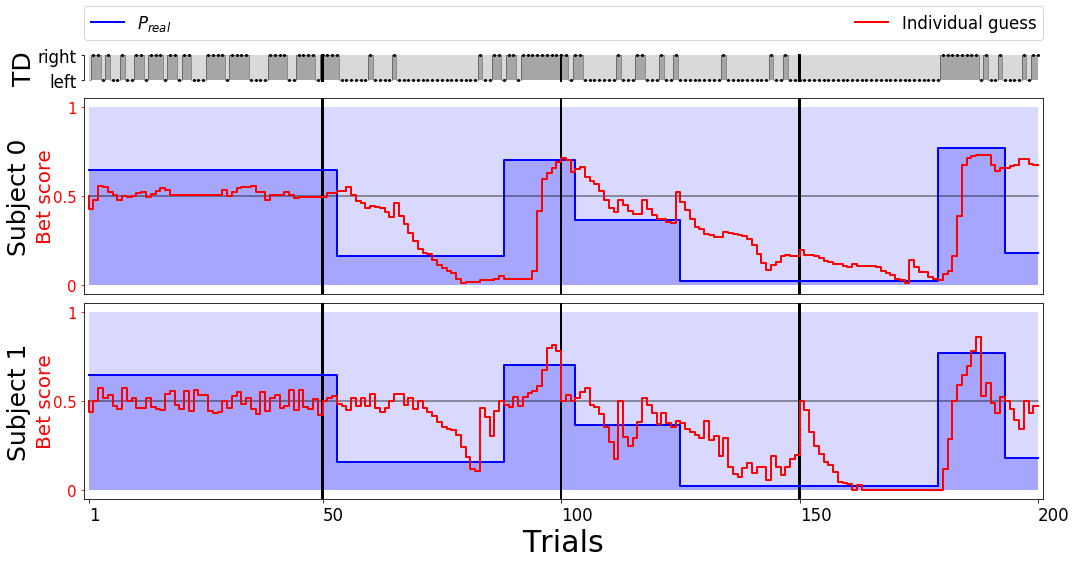

In [7]:
sujet = [0, 5]
fig, axs = e.plot_experiment(color=color, num_block=[0], sujet=sujet, mode='pari', TD=True,
                             direction=True, titre='', legends=True, lw=2, t_label=30)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


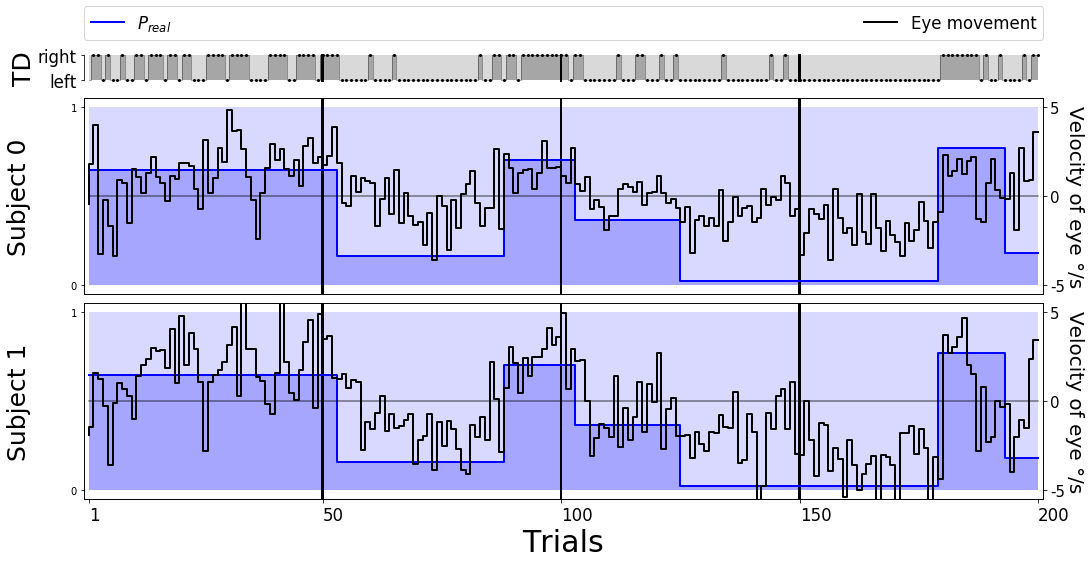

In [8]:
fig, axs = e.plot_experiment(mode='enregistrement', sujet=sujet, color=color, num_block=[0],TD=True,
                             direction=True, titre='', legends=True, lw=2, t_label=30)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


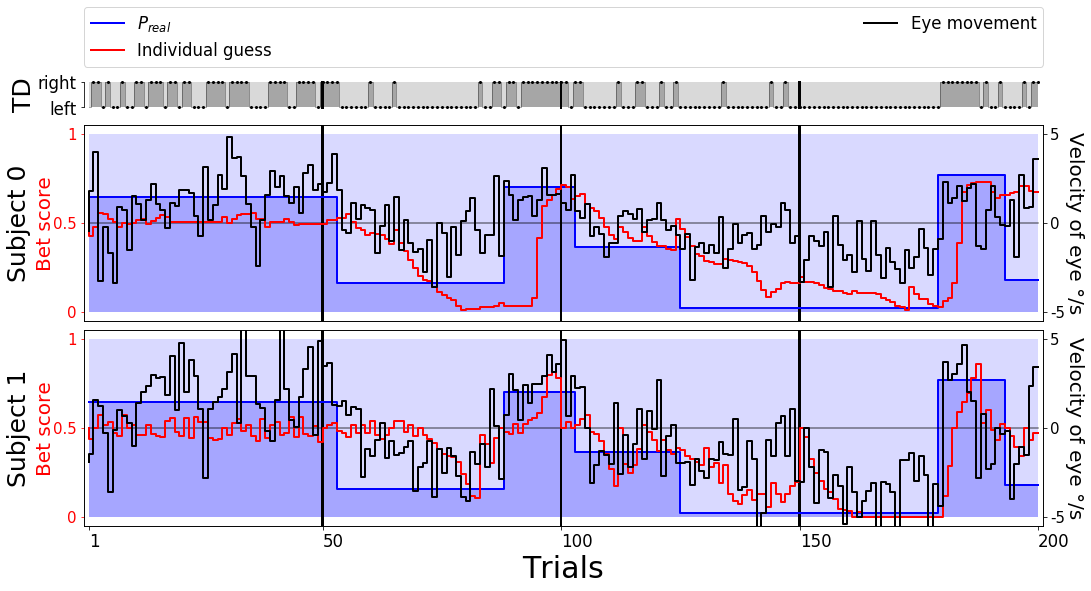

In [9]:
fig, axs = e.plot_experiment(mode='deux', color=color, sujet=sujet, num_block=[0], TD=True,
                             direction=True, titre='', legends=True, lw=2, t_label=30)

# 3 Blocks

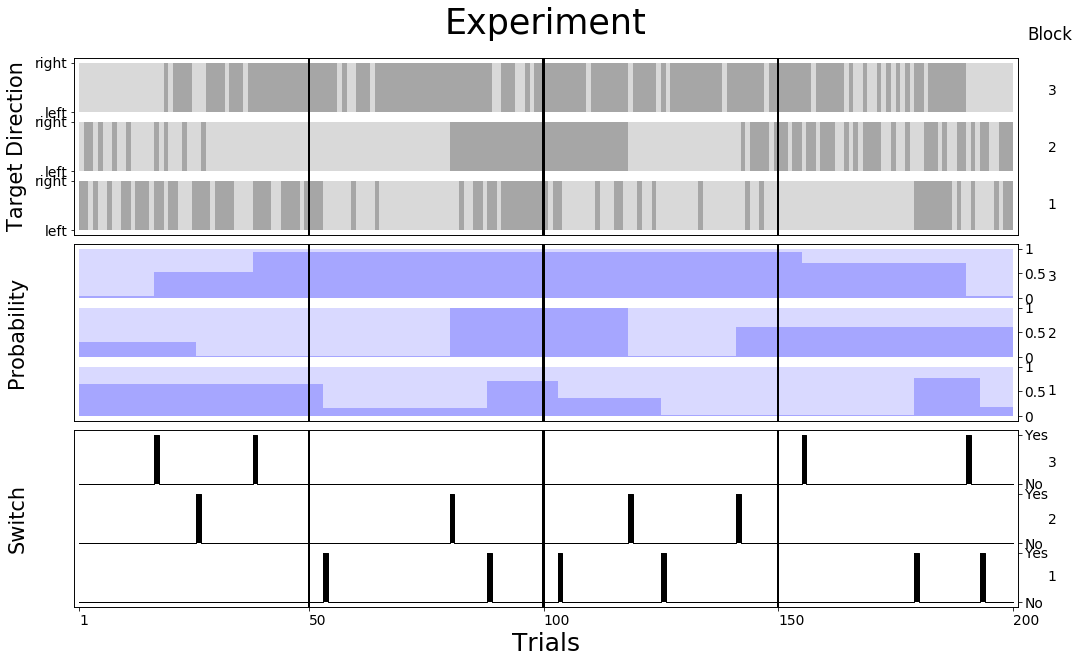

In [10]:
fig, axs = e.plot_experiment(color=color)

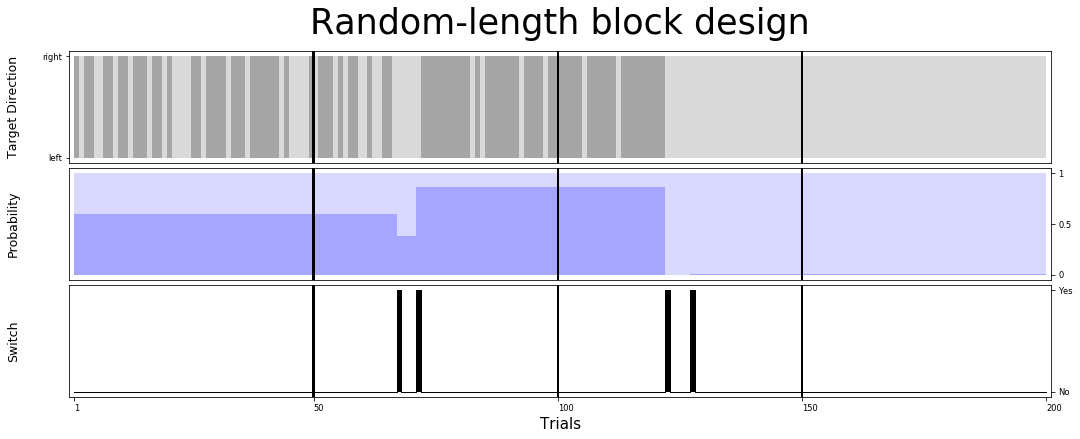

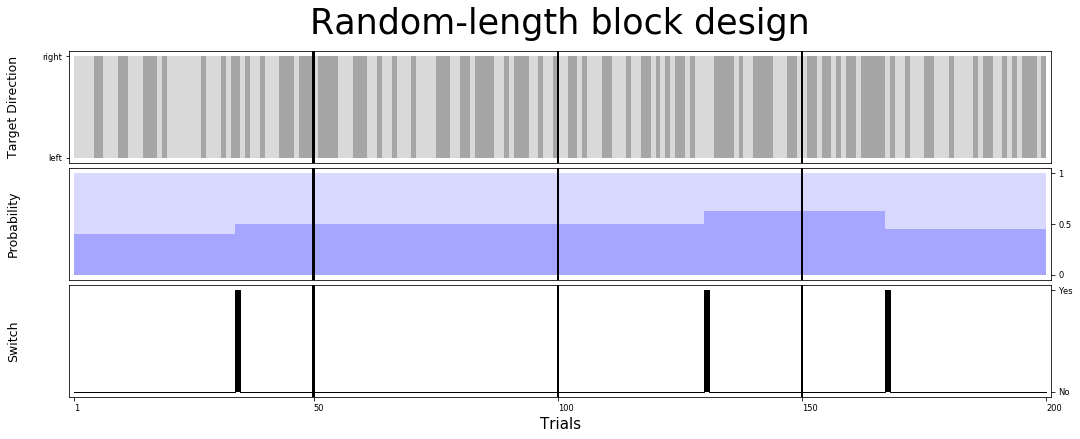

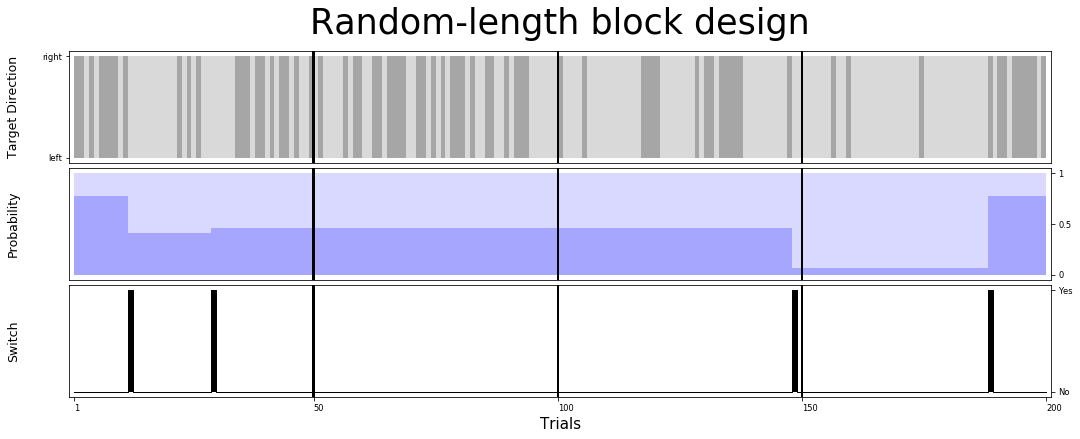

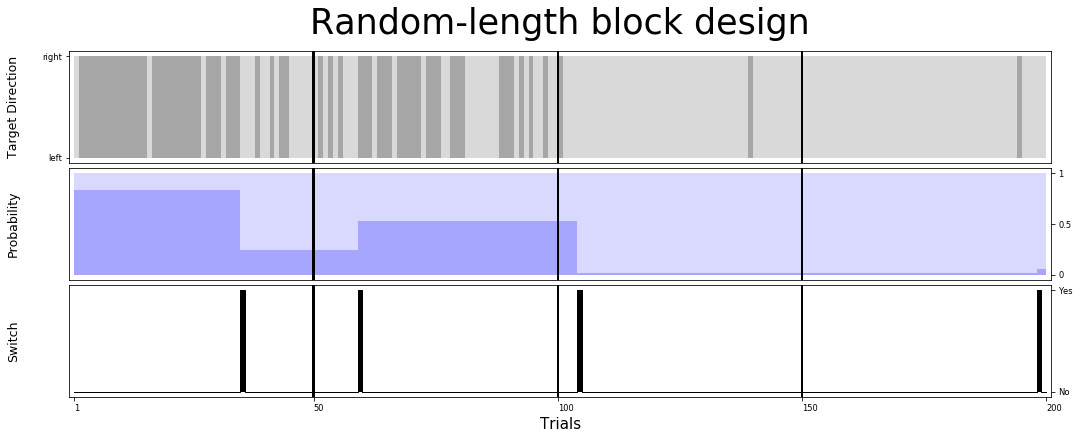

In [11]:
for i in range(4):
    trials, p = binomial_motion(N_trials=200, N_blocks=1, tau=50, seed=1515+i, Jeffreys=True, N_layer=3)

    fig, axs = plt.subplots(3, 1, figsize=(15, 15/(1.6180*1.5)))
    fig, axs = e.plot_experiment(num_block=[0], color=color, p=p, fig=fig, axs=axs, t_titre=35, t_label=15, titre='Random-length block design')
    plt.show()
    

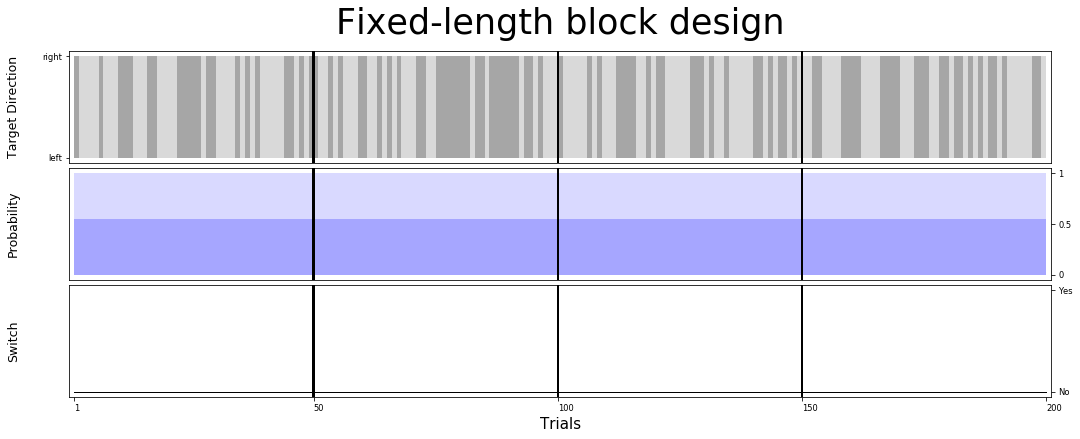

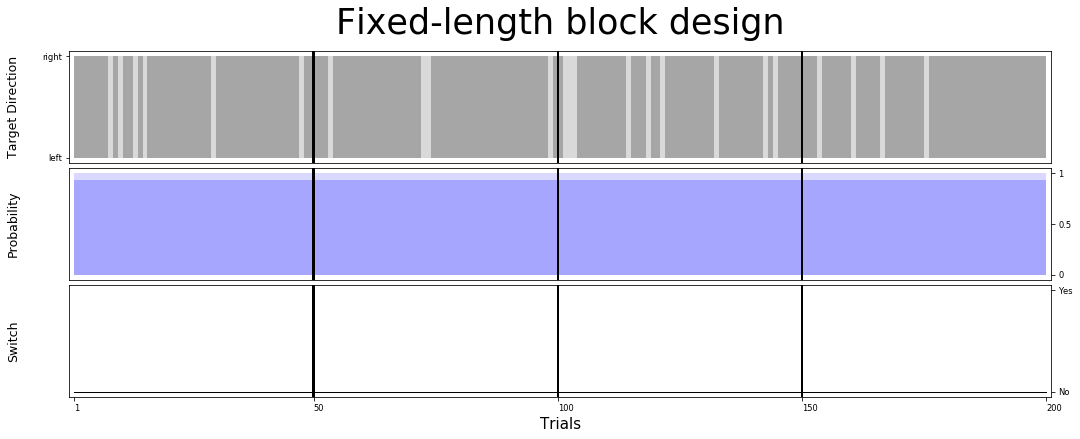

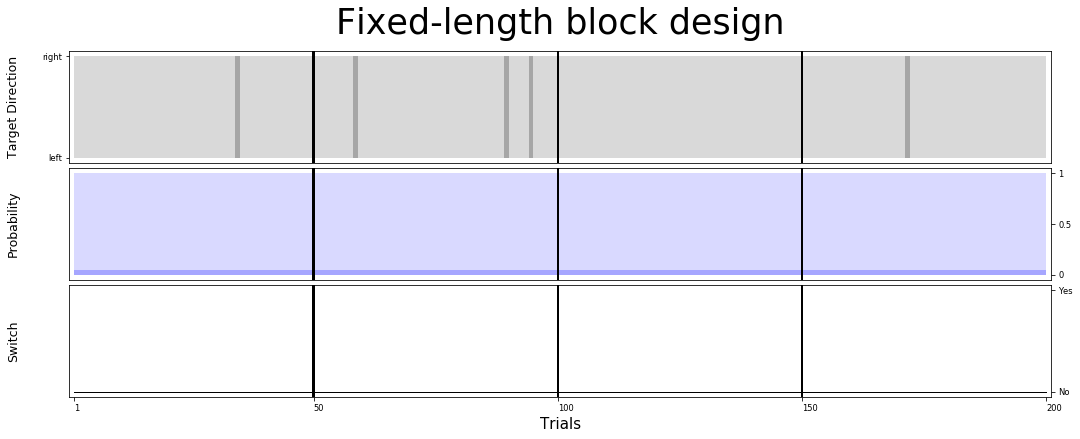

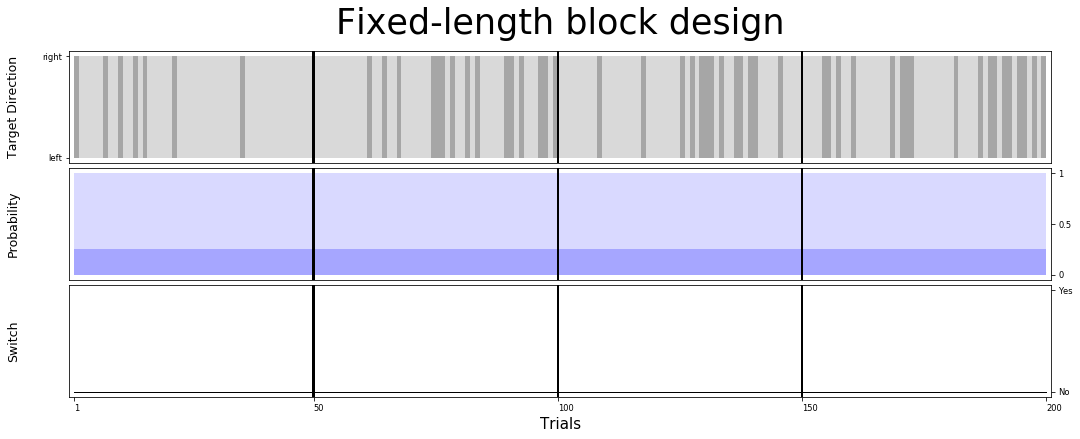

In [12]:
for i in range(4):
    trials, p = binomial_motion(200, 1, 500000, 1973+i, Jeffreys=True, N_layer=3)

    fig, axs = plt.subplots(3, 1, figsize=(15, 15/(1.6180*1.5)))
    fig, axs = e.plot_experiment(num_block=[0],color=color, p=p, fig=fig, axs=axs, t_titre=35, t_label=15, titre='Fixed-length block design')
    plt.show()


In [13]:
def bino_motion(N_trials, N_blocks, seed):

    from scipy.stats import beta
    np.random.seed(seed)

    p = np.zeros((N_trials, N_blocks, 3))

    proba = [0.5, 0.75, 0.9, 1]
    a = 0
    for trial in np.arange(N_trials):
        if trial in [0, 50, 100, 150] :
            p[trial, :, 2] = 1 # switch
            pro = proba[a]
            a=a+1
        
        p[trial, :, 1] = pro # probability
        p[trial, :, 0] =  p[trial, :, 1] > np.random.rand(1, N_blocks) # Bernouilli trial

    return p

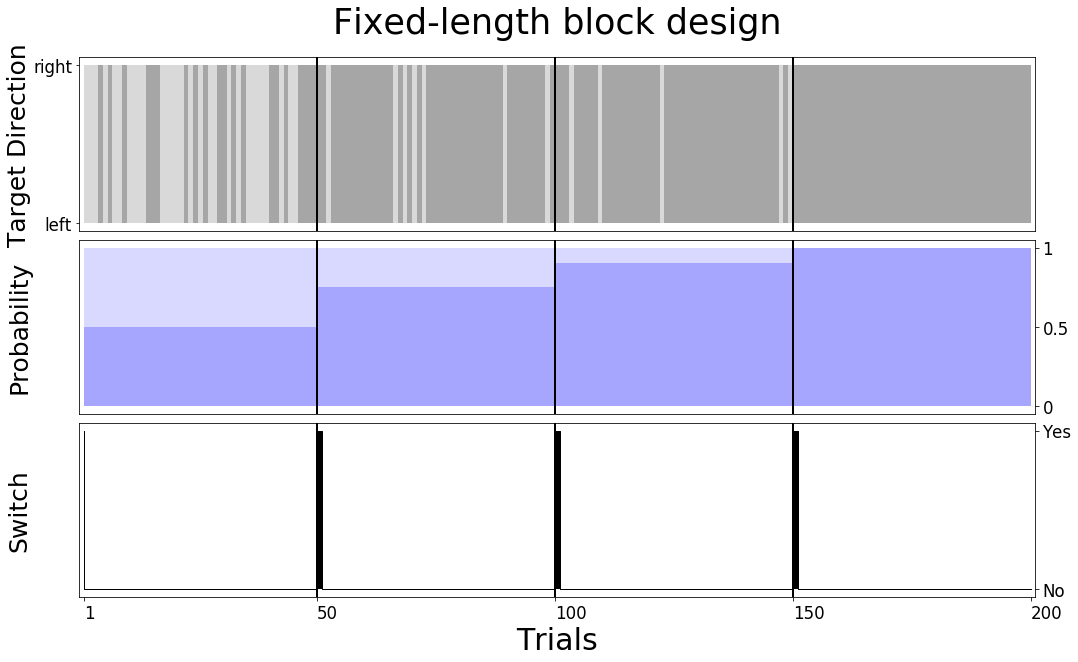

In [14]:
p_ = bino_motion(200, 1,  0)
fig, axs = e.plot_experiment(num_block=[0],color=color, p=p_,
                             t_titre=35, t_label=30, titre='Fixed-length block design')
plt.show()


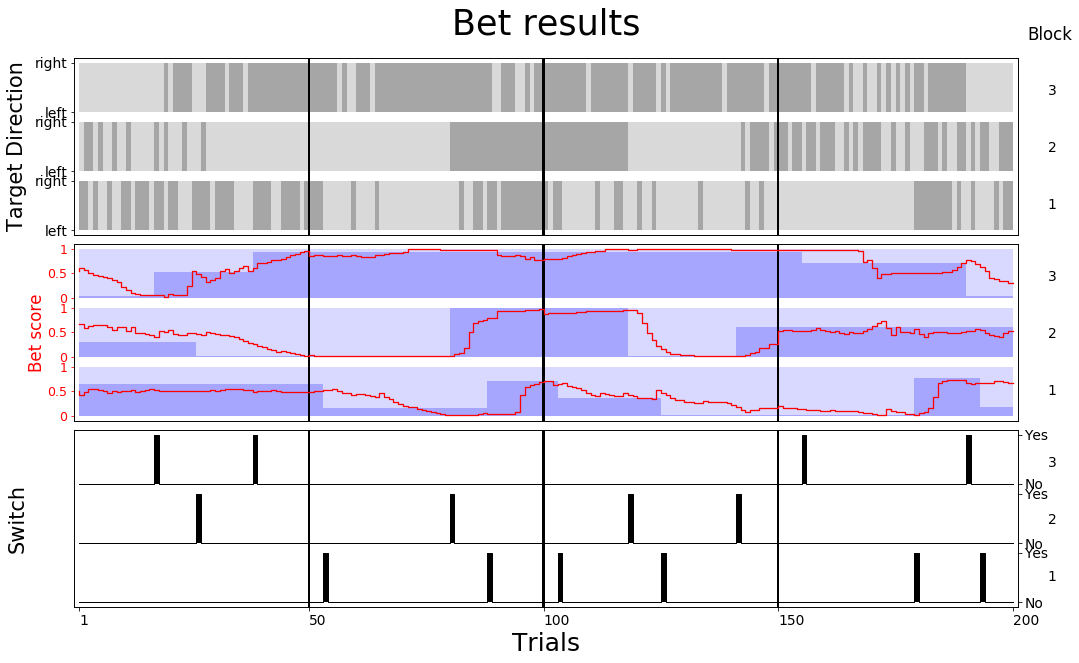

In [15]:
fig, axs = e.plot_experiment(mode='pari',color=color)

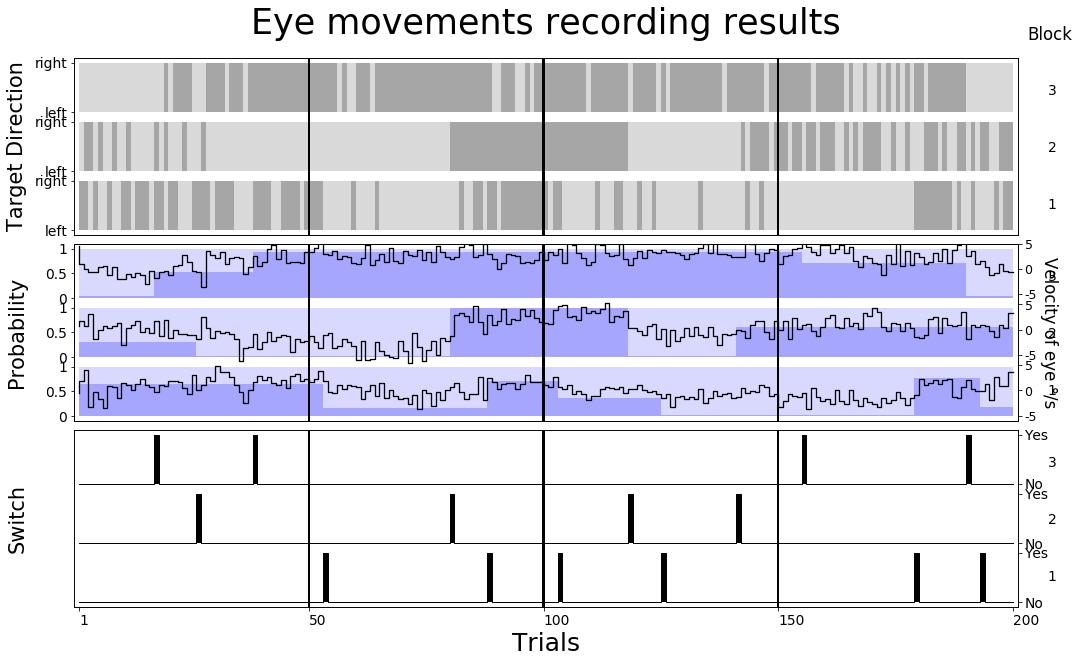

In [16]:
fig, axs = e.plot_experiment(mode='enregistrement', color=color)

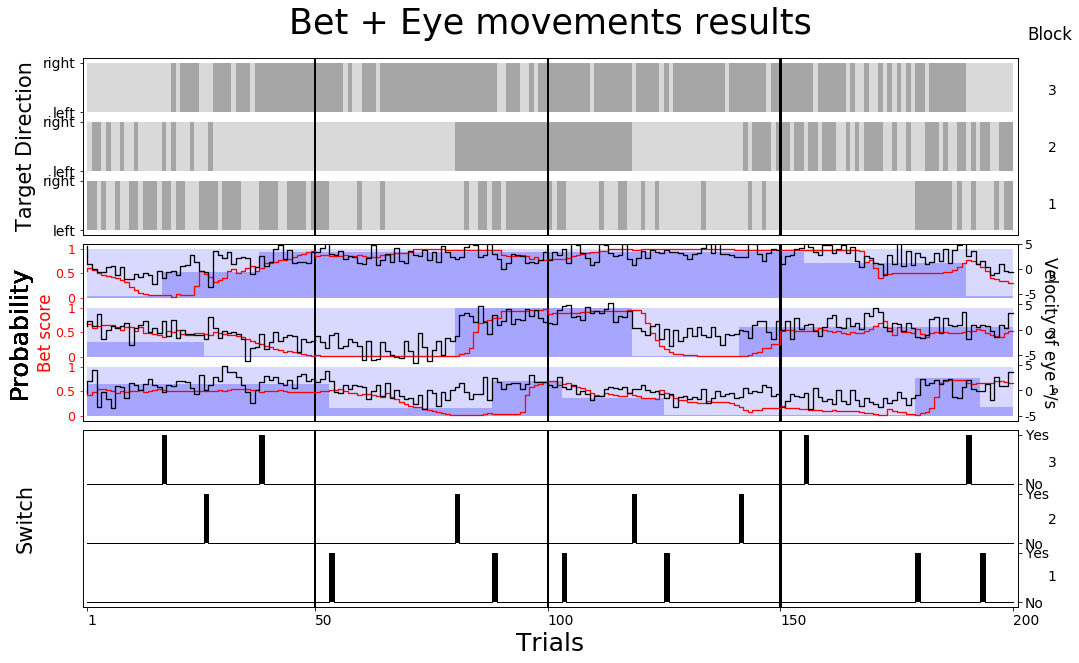

In [17]:
fig, axs = e.plot_experiment(mode='deux', color=color)

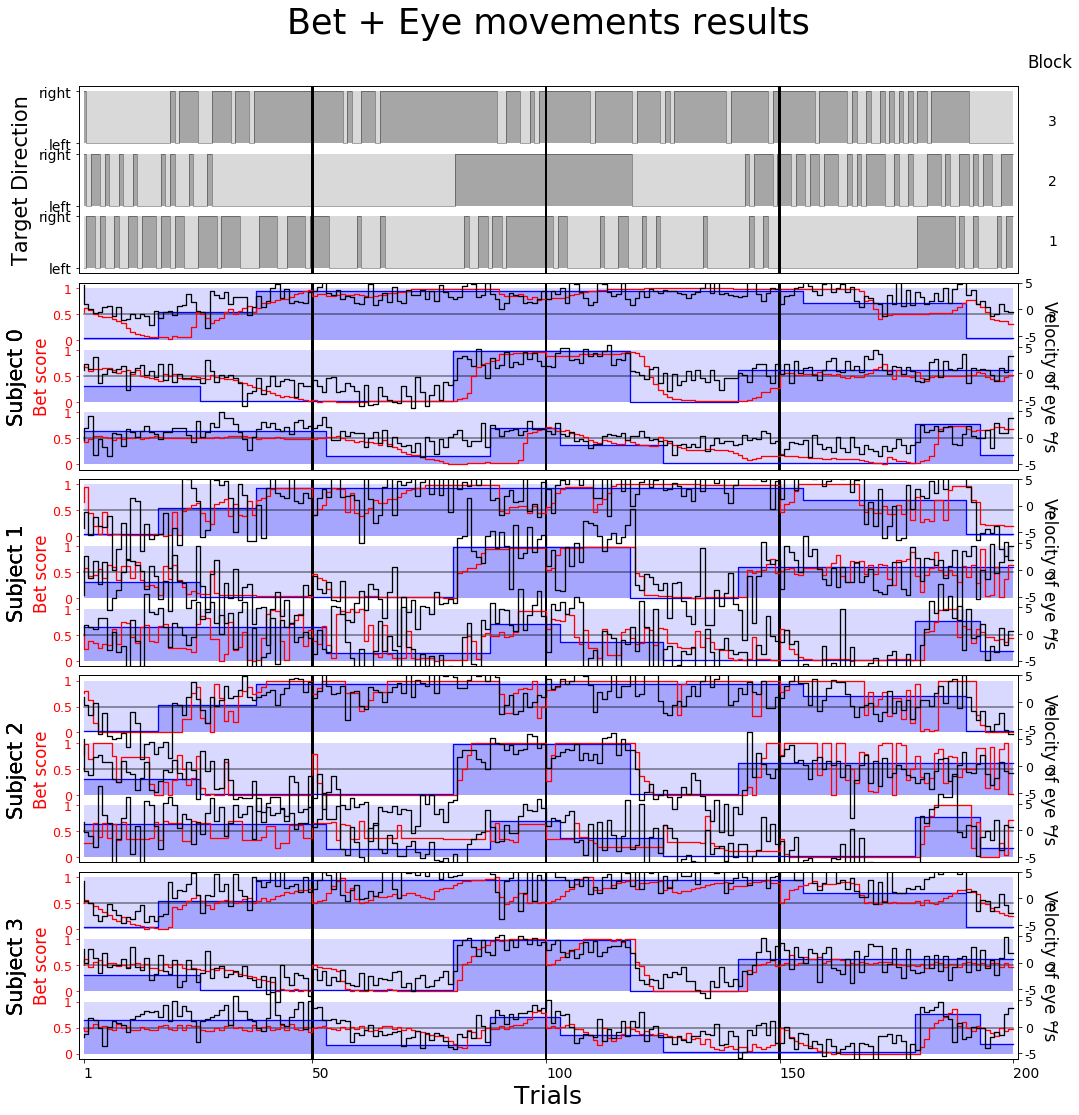

In [18]:
sujet = [0, 6, 10, 5]
fig, axs = e.plot_experiment(sujet=sujet, mode='deux', color=color)

In [19]:
figname = '2_results_enregistrement'

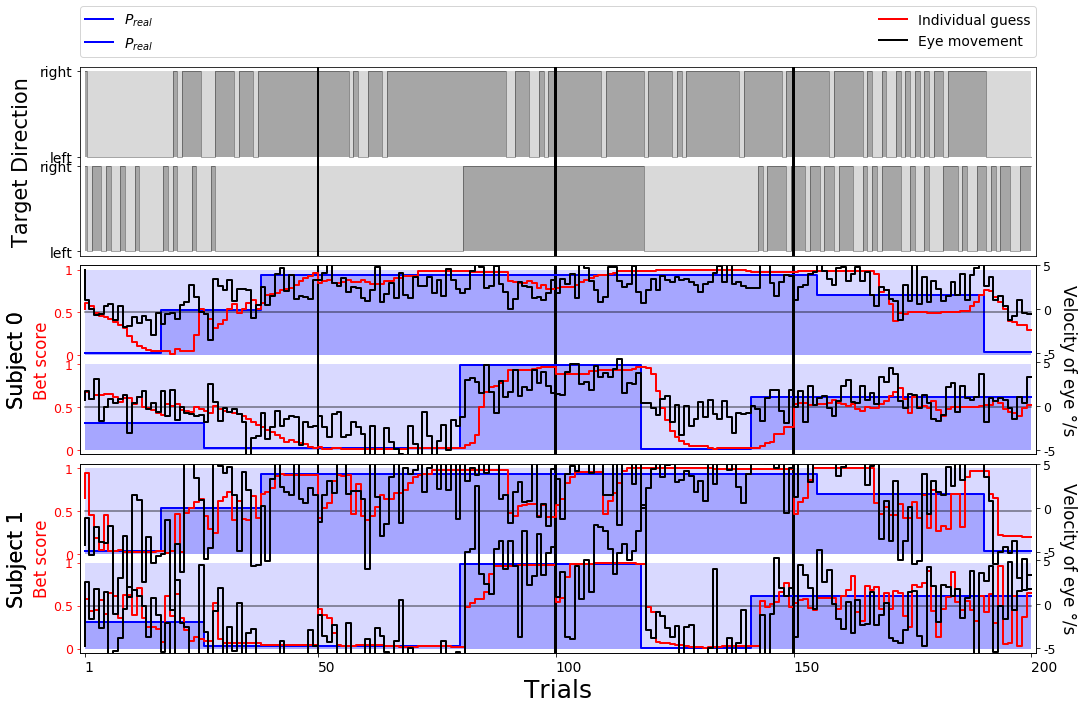

In [20]:
sujet = [0, 6]
fig, axs = e.plot_experiment(sujet=sujet, mode='deux', num_block=[1,2], titre='', color=color, lw=2, legends=True)